<a href="https://colab.research.google.com/github/utkarshg1/Deep-Learning-6-8pm-Tue-Wed/blob/main/Handwritten_Digit_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification - Utkarsh Gaikwad

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the handwritten digit dataset

In [3]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Viewing first image from train data

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

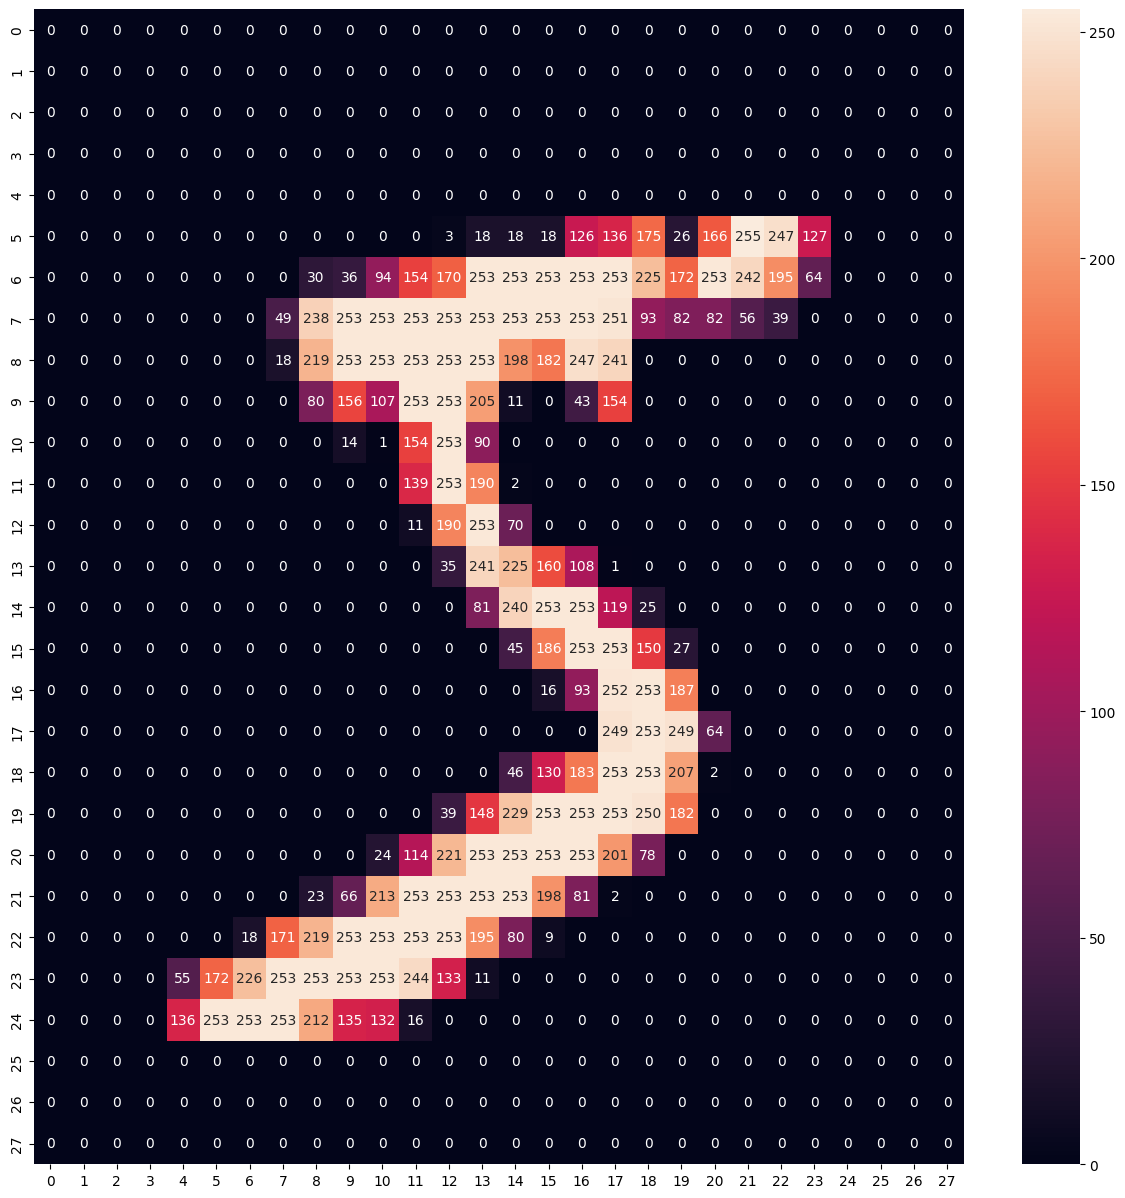

In [11]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

In [12]:
ytrain[0]

5

In [26]:
xtrain[0].shape

(28, 28)

### Visulaize top 9 images from xtrain data

In [13]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


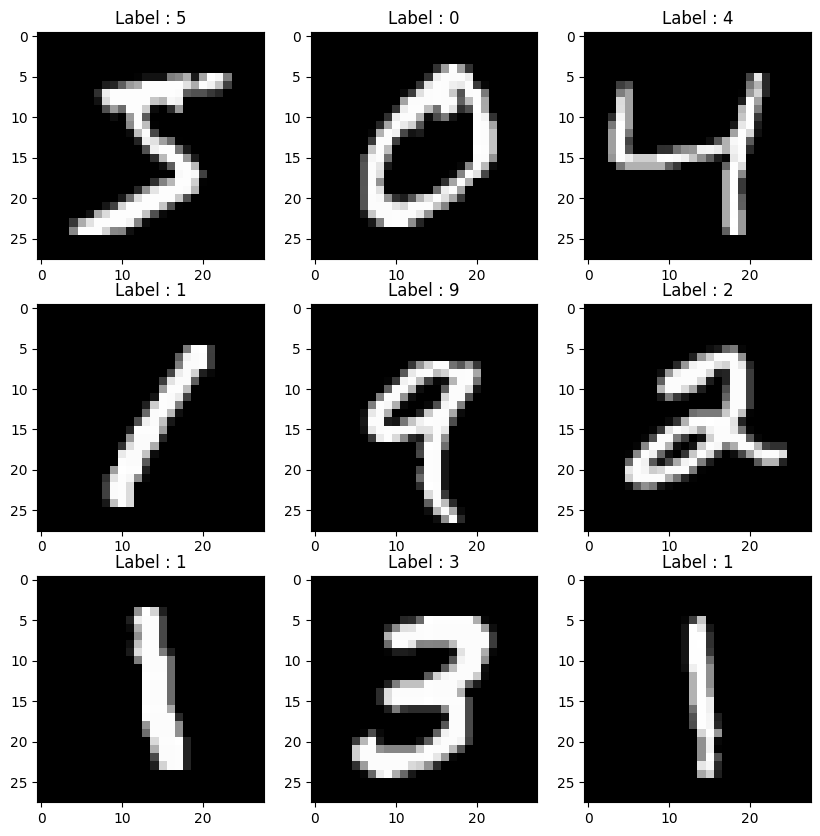

In [15]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'Label : {ytrain[i]}')

In [17]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [27]:
len(np.unique(ytrain))

10

### Because i have more than 2 classes above becomes a multiclass classification problem

### Preprocessing the data

In [16]:
# Scale the x data divide by 255
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

In [18]:
# Apply one hot encoding on target feature because it multiclasss classification problem
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [20]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [24]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a simple Covnet
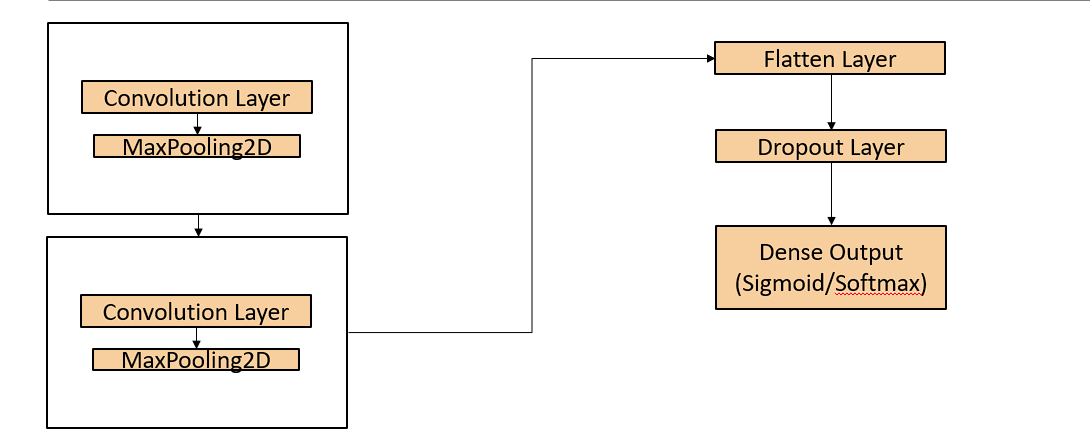

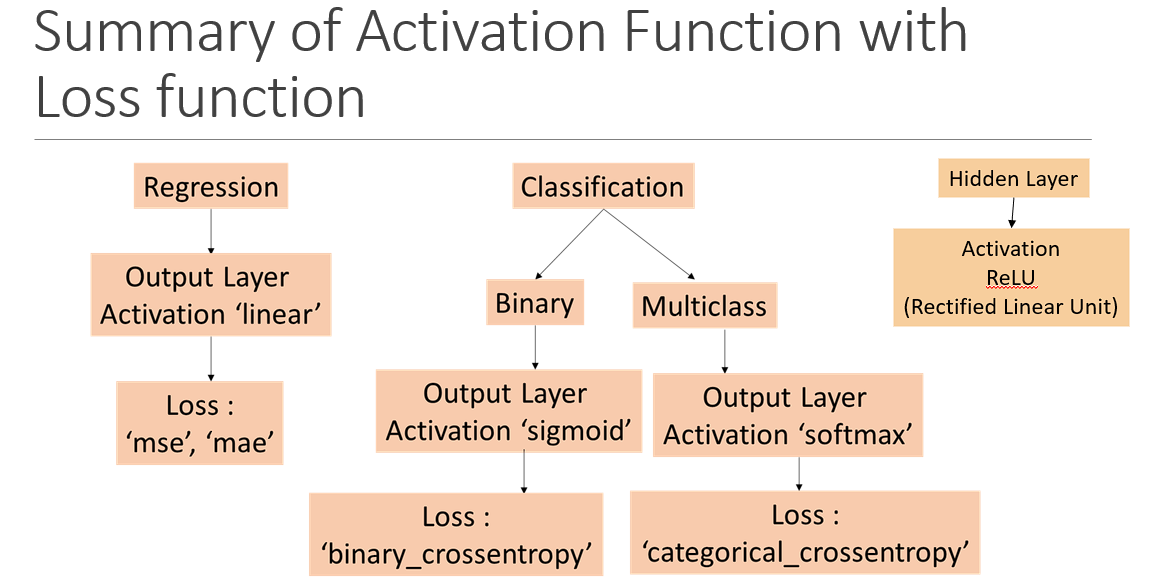

In [25]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [28]:
model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
# Add Maxpooling 1
model.add(MaxPool2D(pool_size=(2,2)))
# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
# Add Max Pooling 2
model.add(MaxPool2D(pool_size=(2,2)))
# Add flatten layer
model.add(Flatten())
# Dropout layer
model.add(Dropout(rate=0.5))
# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Compile the model

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train the neural net

In [32]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2182 - accuracy: 0.9311 - val_loss: 0.0586 - val_accuracy: 0.9852
Epoch 2/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 3/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.0401 - val_accuracy: 0.9893
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0574 - accuracy: 0.9815 - val_loss: 0.0344 - val_accuracy: 0.9908
Epoch 5/15
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0500 - accuracy: 0.9838 - val_loss: 0.0363 - val_accuracy: 0.9892
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0329 - val_accuracy: 0.9912
Epoch 7/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0420 - accuracy: 0.9862 - val_loss: 0.0299 - val_accuracy

### Plot the learning curve for the model

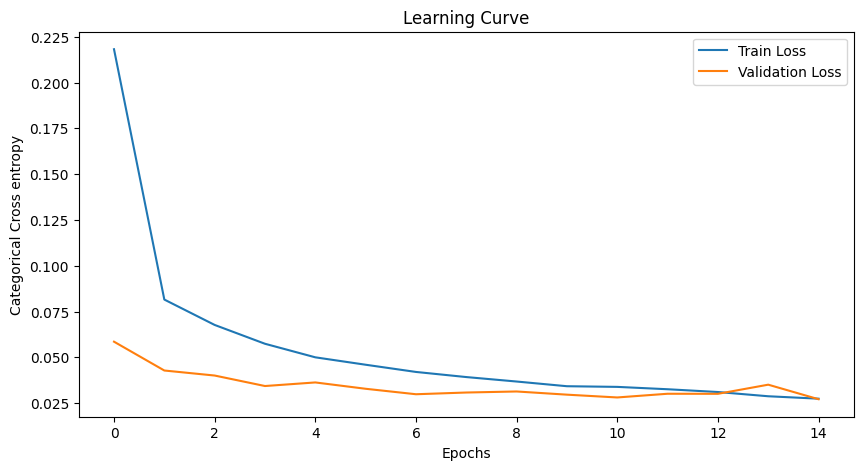

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate model in train and test

In [35]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0111 - accuracy: 0.9968


[0.011079471558332443, 0.9967666864395142]

In [36]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 5ms/step - loss: 0.0236 - accuracy: 0.9927


[0.02363213337957859, 0.9926999807357788]

### Predict the probability for train and test

In [39]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [40]:
yprob_train[0:5]

array([[1.10626482e-11, 5.45362193e-12, 6.95256561e-11, 3.64390056e-04,
        1.42681721e-12, 9.99625087e-01, 1.99261397e-13, 2.85893709e-08,
        6.72824228e-07, 9.84548205e-06],
       [9.99975443e-01, 2.56364923e-14, 2.35654329e-06, 1.03812028e-10,
        1.47247015e-09, 3.10078163e-09, 7.50475829e-06, 8.39838366e-10,
        1.29177931e-06, 1.33877529e-05],
       [9.13752674e-16, 2.33708647e-07, 2.03933051e-10, 4.52208854e-10,
        9.99999285e-01, 4.88175091e-11, 4.73294277e-12, 4.53440322e-07,
        8.98366803e-09, 2.13250324e-08],
       [3.81893912e-08, 9.99675274e-01, 5.04658919e-06, 2.87912832e-10,
        2.59459252e-04, 4.33565983e-09, 9.76973070e-07, 9.35554090e-06,
        4.97356668e-05, 2.41109461e-07],
       [1.80903166e-12, 3.71242481e-11, 1.09454878e-09, 5.17165644e-09,
        9.08534857e-05, 3.53808893e-09, 5.60452191e-14, 1.15329419e-06,
        1.02937425e-04, 9.99805033e-01]], dtype=float32)

In [41]:
yprob_train[0]

array([1.1062648e-11, 5.4536219e-12, 6.9525656e-11, 3.6439006e-04,
       1.4268172e-12, 9.9962509e-01, 1.9926140e-13, 2.8589371e-08,
       6.7282423e-07, 9.8454821e-06], dtype=float32)

### Predictions for train and test

In [42]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [43]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [44]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [45]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [46]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Plot the confusion matrix

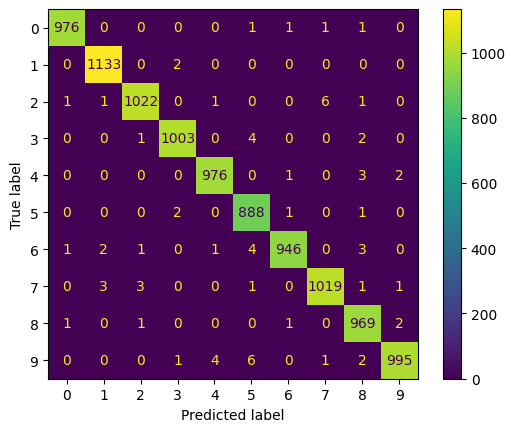

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### Print the classification report

In [49]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Save the keras model for future use

In [50]:
model.save('HandwrittenModel.keras')

### Load the above model

In [51]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0